In [1]:
# Bring proper imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from env import host, user, password

from wrangle import zillow_data

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from env import user, password, host



In [2]:
df = zillow_data()
df = pd.DataFrame(df)
df.head().T

,0,1,2,3,4
bedrooms,0.0,0.0,0.0,0.00,4.00
bathrooms,0.0,0.0,0.0,0.00,2.00
sqft,NaN,NaN,NaN,NaN,3633.00
tax_value,27516.0,10.0,10.0,2108.00,296425.00
year_built,NaN,NaN,NaN,NaN,2005.00
tax_amount,NaN,NaN,NaN,174.21,6941.39
fips,6037.0,6037.0,6037.0,6037.00,6037.00


In [3]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    2152853 non-null  float64
 1   bathrooms   2152853 non-null  float64
 2   sqft        2144379 non-null  float64
 3   tax_value   2152371 non-null  float64
 4   year_built  2143526 non-null  float64
 5   tax_amount  2148422 non-null  float64
 6   fips        2152864 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
# 2,152,863 records and 7 features

df.shape

(2152864, 7)

In [6]:
df.isnull().sum()

bedrooms        11
bathrooms       11
sqft          8485
tax_value      493
year_built    9338
tax_amount    4442
fips             0
dtype: int64

In [7]:
# Display readable summary statistics for numeric columns. Why isn't exam3 showing up?

df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2152853.0,3.287195,0.954757,0.00,3.0000,3.000,4.0000,25.00
bathrooms,2152853.0,2.230687,0.999281,0.00,2.0000,2.000,3.0000,32.00
sqft,2144379.0,1862.855178,1222.125124,1.00,1257.0000,1623.000,2208.0000,952576.00
tax_value,2152371.0,461896.052361,699675.940049,1.00,188170.0000,327671.000,534527.0000,98428909.00
year_built,2143526.0,1960.949681,22.162196,1801.00,1949.0000,1958.000,1976.0000,2016.00
tax_amount,2148422.0,5634.863752,8178.908996,1.85,2534.9725,4108.945,6414.3175,1337755.86
fips,2152864.0,6048.377330,20.433289,6037.00,6037.0000,6037.000,6059.0000,6111.00


## Visualize data


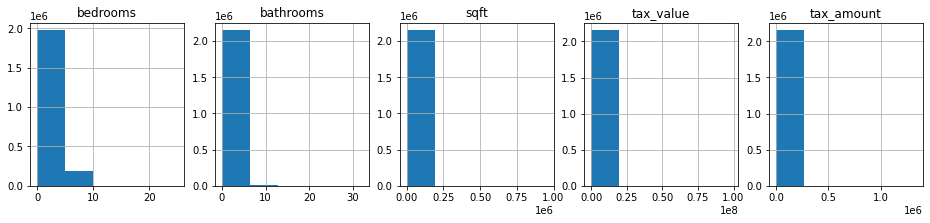

In [8]:
plt.figure(figsize=(16, 3))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'year_built']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
plt.show()

<AxesSubplot:>

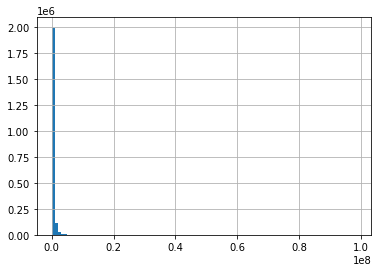

In [9]:
# Looking at tax_value in closer detail
df['tax_value'].hist(bins=100)

### Use boxplot to look distribution to look for outliers

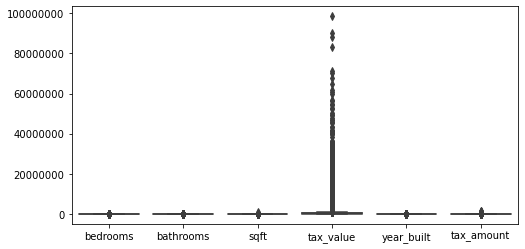

In [10]:
plt.figure(figsize=(8,4))

plt.ticklabel_format(useOffset=False, style='plain')
sns.boxplot(data=df.drop(columns=['fips']))

plt.show()

- tax_value has such a severe outlier problem, it is making the chart unreadable

- Could we make the charts bigger to see if visualization improves?

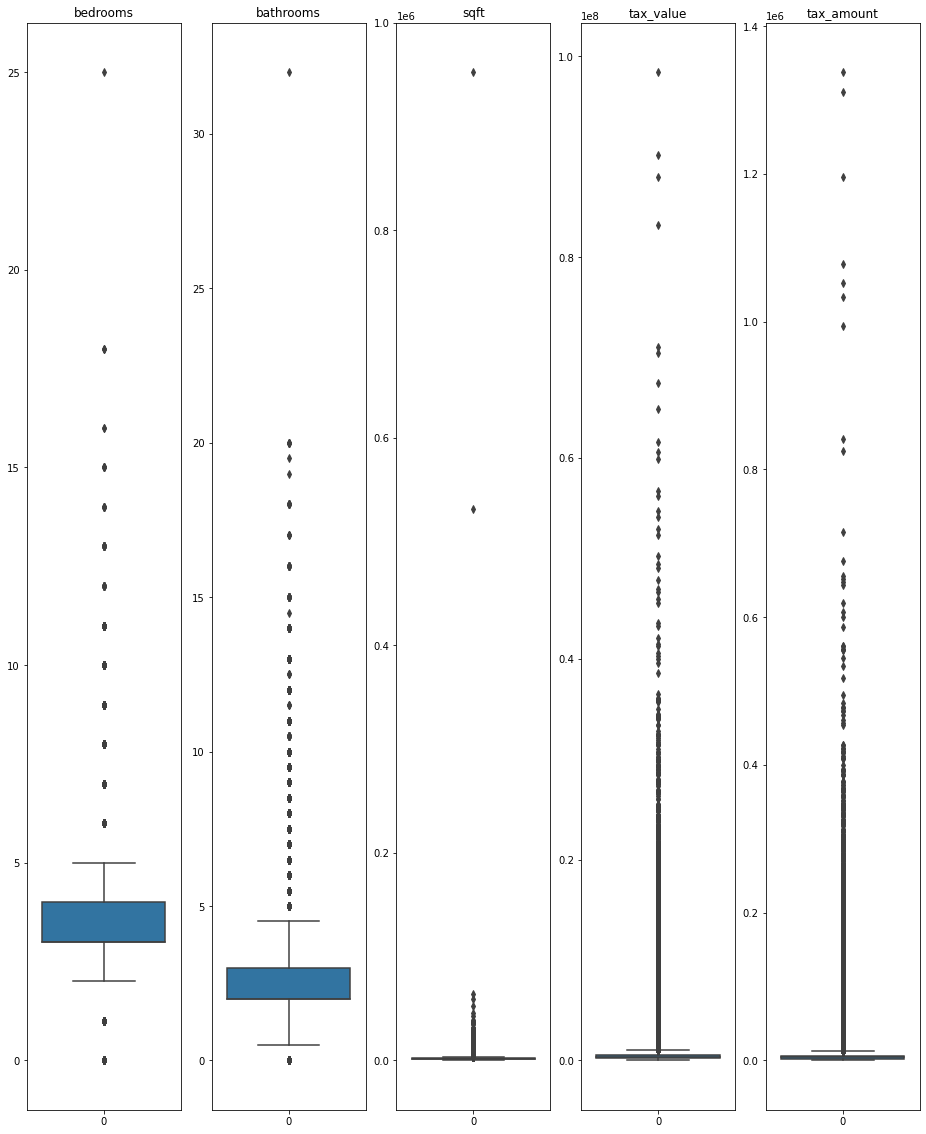

In [11]:
# List of columns
cols = [col for col in df.columns if col not in ['fips', 'year_built']]
plt.figure(figsize=(16, 20))
for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    sns.boxplot(data=df[col])

    # Hide gridlines.
    plt.grid(False)

plt.show()

In [12]:
# What are the quartiles for each of these columns?


df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
count,2.15285e+06,2.15285e+06,2.14438e+06,2.15237e+06,2.14353e+06,2.14842e+06,2.15286e+06
mean,3.28719,2.23069,1862.86,461896,1960.95,5634.86,6048.38
std,0.954757,0.999281,1222.13,699676,22.1622,8178.91,20.4333
min,0,0,1,1,1801,1.85,6037
25%,3,2,1257,188170,1949,2534.97,6037
50%,3,2,1623,327671,1958,4108.94,6037
75%,4,3,2208,534527,1976,6414.32,6059
max,25,32,952576,9.84289e+07,2016,1.33776e+06,6111


## Acquire and Summarize Takeaways

- Substantial outliers exist
- If we presume that we are going to use our data to build a model that focuses on median - home values, then we can drop these outliers.
- This may also help with our null value issue

- There are some fetures that contain null values (all exept fips)
    - 'bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount'
- All are floats
- Outliers must exist in each column for the x-axis to have the range shown
-`tax_value`, `sqft`, `taxamount` look like hey have skew data, due to a x-axis range that goes to 1e...
-`tax_value` seemd to have the most outliers as it has the largest 1e_num (1e7)

# Prepare Data

### Drup Nulls 

In [13]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [14]:
def remove_outliers_v2(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    # Create a column that will label our rows as containing an outlier value or not
    num_obs = df.shape[0]
    df['outlier'] = False
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # update the outlier label any time that the value is outside of boundaries
        df['outlier'] = np.where(((df[col] < lower_bound) | (df[col] > upper_bound)) & (df.outlier == False), True, df.outlier)
    
    df = df[df.outlier == False]
    df.drop(columns=['outlier'], inplace=True)
    print(f"Number of observations removed: {num_obs - df.shape[0]}")
        
    return df

In [15]:
# Use previoulsly created fuctions to get rid of outliers
df = remove_outliers(df, 1.5, ['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'tax_amount'])
df 


,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0
...,...,...,...,...,...,...,...
2152853,3.0,2.0,1917.0,408680.0,1946.0,4341.32,6111.0
2152854,4.0,2.0,1987.0,259913.0,1955.0,3175.66,6059.0
2152856,3.0,2.5,1809.0,405547.0,2012.0,4181.10,6059.0
2152862,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


### Revisualize Distributions 
Lets revisualize our data now that its be cleaned a bit (approximately 300,000 observations removed):

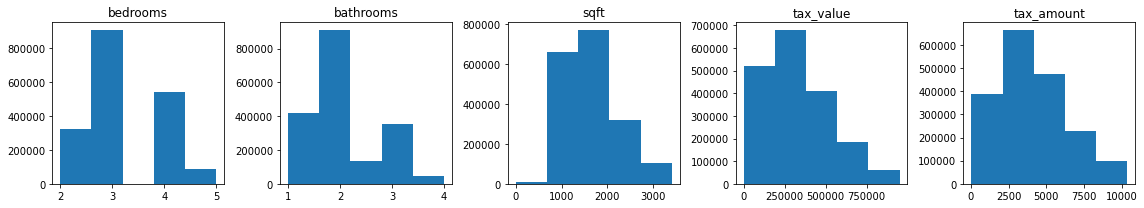

In [16]:
plt.figure(figsize=(16, 3))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'year_built']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
    # mitigate overlap
    plt.tight_layout()
    
plt.show()


### Takeaways
- Bedrooms and bathrooms are not normally distributed
- Other fields are skewed, but are at least approaching a more normal distribution


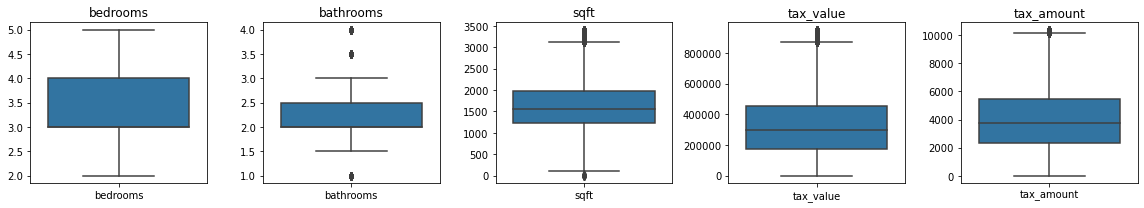

In [17]:
# boxplots again 
cols = ['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'tax_amount']
plt.figure(figsize=(16, 3))

for i, col in enumerate(cols):

    # i starts at 0, but plot should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    sns.boxplot(data=df[[col]])

    # Hide gridlines.
    plt.grid(False)

    # sets proper spacing between plots
    plt.tight_layout()
    
plt.show()

### Drop Null Values

In [18]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1855285 entries, 6 to 2152863
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1855285 non-null  float64
 1   bathrooms   1855285 non-null  float64
 2   sqft        1855285 non-null  float64
 3   tax_value   1855285 non-null  float64
 4   year_built  1854411 non-null  float64
 5   tax_amount  1855285 non-null  float64
 6   fips        1855285 non-null  float64
dtypes: float64(7)
memory usage: 113.2 MB


In [19]:
# get total of null values for each row
df.isnull().sum()

bedrooms        0
bathrooms       0
sqft            0
tax_value       0
year_built    874
tax_amount      0
fips            0
dtype: int64

In [20]:
df = df.dropna()
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854411 entries, 6 to 2152863
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1854411 non-null  float64
 1   bathrooms   1854411 non-null  float64
 2   sqft        1854411 non-null  float64
 3   tax_value   1854411 non-null  float64
 4   year_built  1854411 non-null  float64
 5   tax_amount  1854411 non-null  float64
 6   fips        1854411 non-null  float64
dtypes: float64(7)
memory usage: 113.2 MB


In [21]:
# consider imputing year ()built
df.year_built.value_counts()

1955.0    80451
1950.0    66876
1954.0    65523
1953.0    58746
1956.0    58054
          ...  
1855.0        1
1874.0        1
1807.0        1
1833.0        1
1823.0        1
Name: year_built, Length: 152, dtype: int64

In [22]:
df.year_built.describe().apply(lambda x: format(x, 'f'))

count    1854411.000000
mean        1959.444875
std           20.546039
min         1801.000000
25%         1949.000000
50%         1957.000000
75%         1972.000000
max         2016.000000
Name: year_built, dtype: object

- The null values have been cleaned up by removing the outliers
-The mean, median, and mode are all relatively similar to each other
-We could try and develop a complex imputation method to estimate the year built based off other columns, but for speed, we will just use the median.

## What if removing the outliers didn't clean up our nulls? What would we do then?
`.dropna()` We can utilize some of the parameters of .dropna() to clean up our nulls:

- axis: {0 or ‘index’, 1 or ‘columns’}, default 0
    - 0, or ‘index’ : Drop rows which contain missing values.
    - 1, or ‘columns’ : Drop columns which contain missing value.
- how: {‘any’, ‘all’}, default ‘any’
    - ‘any’ : If any NA values are present, drop that row or column.
    - ‘all’ : If all values are NA, drop that row or column.
- thresh: int, optional
    - Require that many non-NA values.
- subset: array-like, optional
    - Give the columns to consider, ignore non-listed columns
    
Thresh is useful, but it is limited to an integer amount. What if we wanted to remove columns that had a certain proportion of na values?

In [23]:
# Set our null threshold. Any columns that have this ratio or higher will be removed
missing_perc_thresh = 0.98

# Create empty list to keep track of which columns we plan on dropping
exclude_missing = []

# Find columns that have a greater null percentage than our threshold
num_rows = df.shape[0]
for c in df.columns:
    num_missing = df[c].isnull().sum()
    if num_missing == 0:
        continue
    missing_frac = num_missing / float(num_rows)
    if missing_frac > missing_perc_thresh:
        exclude_missing.append(c)
print("We exclude: %s" % exclude_missing)

# Drop these columns from our dataset
df.drop(columns=exclude_missing, inplace=True)

We exclude: []


# Convert Data Types

### Are the column data types correct?


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854411 entries, 6 to 2152863
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   sqft        float64
 3   tax_value   float64
 4   year_built  float64
 5   tax_amount  float64
 6   fips        float64
dtypes: float64(7)
memory usage: 113.2 MB


In [25]:
# get value counts and decide on data types
cols = df.columns

for col in cols:
    
    print(col.upper())
    print(df[col].value_counts())
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print()

BEDROOMS
3.0    904877
4.0    539665
2.0    320446
5.0     89423
Name: bedrooms, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

BATHROOMS
2.00    909434
1.00    385680
3.00    351940
2.50    132326
4.00     31961
1.50     30713
3.50     12354
1.75         3
Name: bathrooms, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

SQFT
1200.0    5091
1080.0    4313
1120.0    4286
1400.0    3776
1440.0    3617
          ... 
417.0        1
447.0        1
345.0        1
507.0        1
372.0        1
Name: sqft, Length: 3015, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

TAX_VALUE
450000.0    806
500000.0    753
400000.0    701
430000.0    677
440000.0    671
           ... 
76686.0       1
826544.0      1
431059.0      1
66878.0       1
366635.0      1
Name: tax_value, Length: 457417, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

YEAR_BUILT
1955.0    80451
1950.0    66876
1954.0    65523
1953.0    58746
1956.0    58054
          ...  
1855.0        1
1874.0        1
1807.0        

## Takeaways
- We should cast fips and year built as an object because it is a numerical represintation of a catagorical value
- All other will stay as ints 

In [26]:
df.fips = df.fips.astype(object)
df.year_built = df.year_built.astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854411 entries, 6 to 2152863
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   sqft        float64
 3   tax_value   float64
 4   year_built  object 
 5   tax_amount  float64
 6   fips        object 
dtypes: float64(5), object(2)
memory usage: 113.2+ MB


In [27]:
# get total of null values for each row
df.isnull().sum()

bedrooms      0
bathrooms     0
sqft          0
tax_value     0
year_built    0
tax_amount    0
fips          0
dtype: int64

NOTE: if there were missing values at this point it would be nice to fill empty values

-Default arguments for value and method parameters:
    - `df.fillna(value=None, method=None)`

# Split Data     

In [28]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

## Impute year_built with mode

In [29]:
imputer = SimpleImputer(strategy='median')  # build imputer

imputer.fit(train[['year_built']]) # fit to train

# transform the data
train[['year_built']] = imputer.transform(train[['year_built']])
validate[['year_built']] = imputer.transform(validate[['year_built']])
test[['year_built']] = imputer.transform(test[['year_built']])

In [30]:
train.isnull().sum()

bedrooms      0
bathrooms     0
sqft          0
tax_value     0
year_built    0
tax_amount    0
fips          0
dtype: int64

In [31]:
validate.isnull().sum()

bedrooms      0
bathrooms     0
sqft          0
tax_value     0
year_built    0
tax_amount    0
fips          0
dtype: int64

In [32]:
test.isnull().sum()

bedrooms      0
bathrooms     0
sqft          0
tax_value     0
year_built    0
tax_amount    0
fips          0
dtype: int64

In [33]:
train.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
894604,4.0,2.0,1694.0,393986.0,1972.0,5289.08,6111.0
221576,3.0,3.0,2284.0,411257.0,1990.0,5242.36,6037.0
2076710,3.0,2.5,1799.0,79563.0,1968.0,766.38,6059.0
1051549,3.0,1.0,1024.0,50267.0,1949.0,899.90,6037.0
1575944,2.0,1.0,660.0,120734.0,1924.0,1533.73,6037.0
